# ROM Data Collected on Sep. 12 from 1pm to 3pm

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import glob
import pandas as pd
import numpy as np
# read all '.csv' files
#df = pd.concat([pd.read_csv(f) for f in glob.glob('*.csv')], ignore_index = True)

In [2]:
# Learning agent with parameterized action space
data_para_agent = pd.read_csv('20180912-1pm_2pm.csv')
# Prescribed behavior wit Adam's default paramters
data_baseline = pd.read_csv('20180912-2pm_3pm_baseline.csv')

In [3]:
print('Data of Prescribed behavior: {}'.format(data_baseline.shape))
print('Data of Parameterized Learning Agent: {}'.format(data_para_agent.shape))

Data of Prescribed behavior: (1849, 4)
Data of Parameterized Learning Agent: (916, 4)


In [4]:
data_baseline.columns

Index(['Time', 'Observation', 'Reward', 'Action'], dtype='object')

## Reward Collected From 1pm to 3pm

<IPython.core.display.Javascript object>


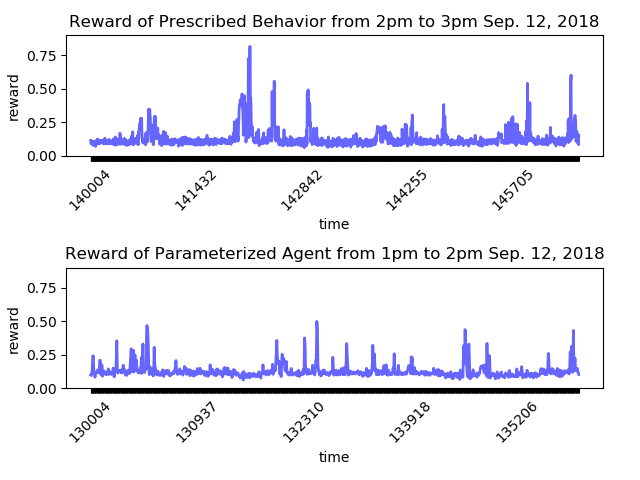

In [5]:
plt.figure()
# Baseline
ax1 = plt.subplot(2, 1, 1)
ax1.plot([time.split('-')[1] for time in data_baseline['Time']], data_baseline['Reward'], 'b-', lw=2, alpha=0.6)
every_nth = 400
for n, label in enumerate(ax1.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.xlabel('time')
plt.ylabel('reward')
plt.ylim(ymin=0, ymax=0.9)
plt.title('Reward of Prescribed Behavior from 2pm to 3pm Sep. 12, 2018')
#plt.grid(True)

# Parameterized Agent
ax2 = plt.subplot(2, 1, 2)
ax2.plot([time.split('-')[1] for time in data_para_agent['Time']], data_para_agent['Reward'], 'b-', lw=2, alpha=0.6)
every_nth = 200
for n, label in enumerate(ax2.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.xlabel('time')
plt.ylabel('reward')
plt.ylim(ymin=0, ymax=0.9)
plt.title('Reward of Parameterized Agent from 1pm to 2pm Sep. 12, 2018')
#plt.grid(True)

plt.tight_layout()
plt.show()

## Histogram of Reward

<IPython.core.display.Javascript object>


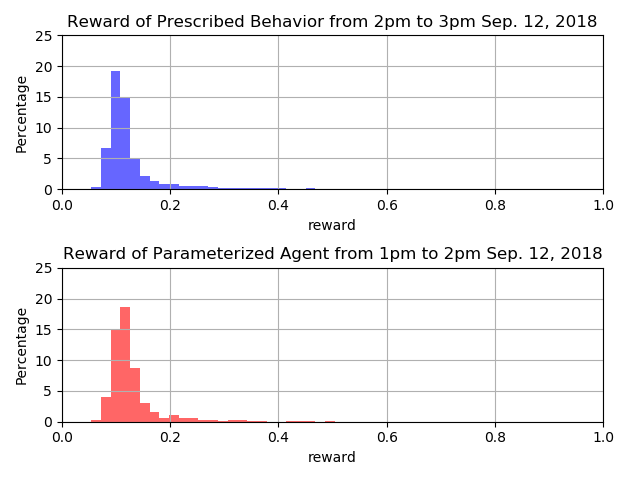

In [6]:
plt.figure(2)
bins = 50
# Baseline
ax3 = plt.subplot(2, 1, 1)
ax3.hist(data_baseline['Reward'], bins, range=(0, 0.9), density = True, color = 'b', alpha=0.6)
plt.xlabel('reward')
plt.ylabel('Percentage')
plt.xlim(0, 1)
plt.ylim(0, 25)
plt.title('Reward of Prescribed Behavior from 2pm to 3pm Sep. 12, 2018')
plt.grid(True)

# Parameterized Agent
ax4 = plt.subplot(2, 1, 2)
ax4.hist(data_para_agent['Reward'], bins, range=(0, 0.9), density = True, color = 'r', alpha=0.6)
plt.xlabel('reward')
plt.ylabel('Percentage')
plt.xlim(0, 1)
plt.ylim(0, 25)
plt.title('Reward of Parameterized Agent from 1pm to 2pm Sep. 12, 2018')
plt.grid(which='both')

plt.tight_layout()
plt.show()



Put two histograms together to ease comparision.

<IPython.core.display.Javascript object>


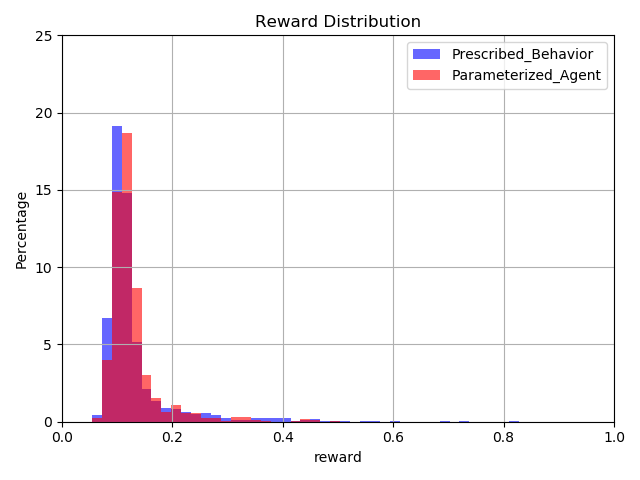

In [7]:
plt.figure()
bins = 50
# Baseline
plt.hist(data_baseline['Reward'], bins, range=(0, 0.9), density = True, color = 'b', alpha=0.6)
# Parameterized Agent
plt.hist(data_para_agent['Reward'], bins, range=(0, 0.9), density = True, color = 'r', alpha=0.6)

plt.xlabel('reward')
plt.ylabel('Percentage')
plt.xlim(0, 1)
plt.ylim(0, 25)
plt.title('Reward Distribution')
plt.grid(True)
plt.legend(('Prescribed_Behavior','Parameterized_Agent'))
plt.tight_layout()
plt.show()

## Truncated Reward Signal
The reward remains at around 0.1, when no visitors.

In [8]:
truncated_reward_baseline = []
for d in data_baseline['Reward']:
    if d <=0.1:
        truncated_reward_baseline.append(0)
    else:
        truncated_reward_baseline.append(d)
truncated_reward_para_agent = []
for d in data_para_agent['Reward']:
    if d <=0.1:
        truncated_reward_para_agent.append(0)
    else:
        truncated_reward_para_agent.append(d)

<IPython.core.display.Javascript object>


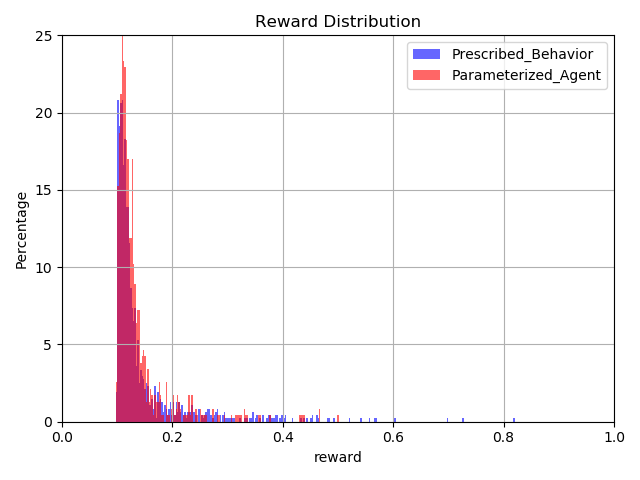

In [9]:
plt.figure()
bins = 350
# Baseline
plt.hist(truncated_reward_baseline, bins, range=(0, 0.9), density = True, color = 'b', alpha=0.6)
# Parameterized Agent
plt.hist(truncated_reward_para_agent, bins, range=(0, 0.9), density = True, color = 'r', alpha=0.6)

plt.xlabel('reward')
plt.ylabel('Percentage')
plt.xlim(0, 1)
plt.ylim(0, 25)
plt.title('Reward Distribution')
plt.grid(True)
plt.legend(('Prescribed_Behavior','Parameterized_Agent'))
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


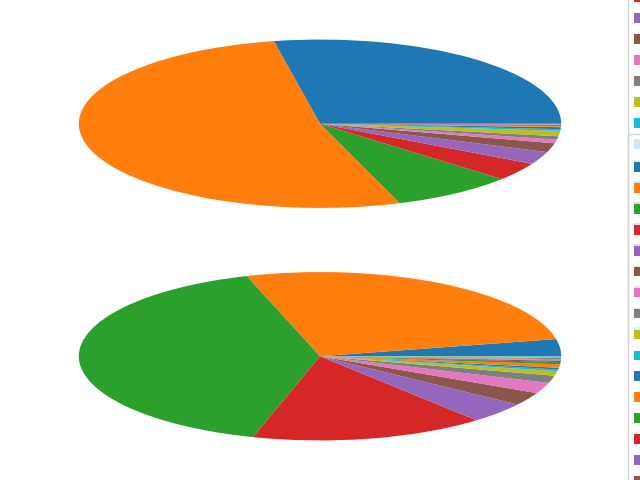

In [22]:
plt.figure()
bins = 20
plt.subplot(2, 1, 1)
hist_reward_baseline = np.histogram(data_baseline['Reward'], bins,  density=True)
wedges_baseline, texts_baseline = plt.pie(hist_reward_baseline[0])
plt.legend(wedges_baseline, texts_baseline,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.subplot(2, 1, 2)
hist_reward_para_agent = np.histogram(data_para_agent['Reward'], bins, density=True)
wedges_para_agent, texts_para_agent = plt.pie(hist_reward_para_agent[0])
plt.legend(wedges_para_agent, texts_para_agent,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

In [23]:
hist_reward_baseline

(array([ 7.41505973, 13.81572787,  2.17165526,  0.92866837,  0.64292425,
         0.45719058,  0.18573367,  0.17144647,  0.27145691,  0.08572323,
         0.10001044,  0.04286162,  0.02857441,  0.04286162,  0.01428721,
         0.        ,  0.01428721,  0.01428721,  0.        ,  0.01428721]),
 array([0.06085044, 0.09870479, 0.13655914, 0.17441349, 0.21226784,
        0.25012219, 0.28797654, 0.32583089, 0.36368524, 0.40153959,
        0.43939394, 0.47724829, 0.51510264, 0.55295699, 0.59081134,
        0.62866569, 0.66652004, 0.70437439, 0.74222874, 0.78008309,
        0.81793744]))

In [29]:
len(data_para_agent['Observation'][0])

1087

In [31]:
data_para_agent.columns

Index(['Time', 'Observation', 'Reward', 'Action'], dtype='object')

In [35]:
len(data_para_agent['Action'][0])

208

In [37]:
data_para_agent['Action'][0]

'[ 0.99998695 -0.51762605 -0.629533   -0.3249556   0.79830325  0.1627142\r\n  0.8882004   0.19136241  0.21823795 -0.15157582  0.7648168   0.97476065\r\n  0.23739189  0.42060497  0.6419771  -0.0836459   0.97553563]'

In [39]:
pd.to_numeric(data_para_agent['Action'][0], errors='ignore')

'[ 0.99998695 -0.51762605 -0.629533   -0.3249556   0.79830325  0.1627142\r\n  0.8882004   0.19136241  0.21823795 -0.15157582  0.7648168   0.97476065\r\n  0.23739189  0.42060497  0.6419771  -0.0836459   0.97553563]'

## Video of Camera1 from 1pm to 3pm
1. [YouTube: ROM Camera1 Sep 12 from 2pm to 3pm-baseline](https://youtu.be/Bl3uG9aIdaA)
2. [YouTube: ROM Camera1 Sep 12 from 1pm to 2pm - Parameterized Learning Agent](https://youtu.be/uldVgU20xWE)

In [66]:
time_seq = []
occupancy_seq = []
with open('Camera1_1pm_2pm_July_4_2018_processed_occupancy.txt', 'r') as file:
    for line in file.readlines():
        line = line.replace('\n','')
        line = line.replace('(','')
        line = line.replace(')','')
        time, occupancy = line.split(',')
        time_seq.append(float(time)/1000) # convert millisecond to second
        occupancy_seq.append(float(occupancy))
        #print('Time: {}, Occupancy: {}'.format(time, occupancy))


In [79]:
print('Number of data: {}, Maximun time: {}s'.format(len(time_seq), max(time_seq)))

Number of data: 173206, Maximun time: 3600.8319999999994s


In [87]:
from scipy import signal
b, a = signal.butter(10, 100, 'low', analog=True)
occupancy = signal.lfilter(b, a, occupancy_seq)

<IPython.core.display.Javascript object>


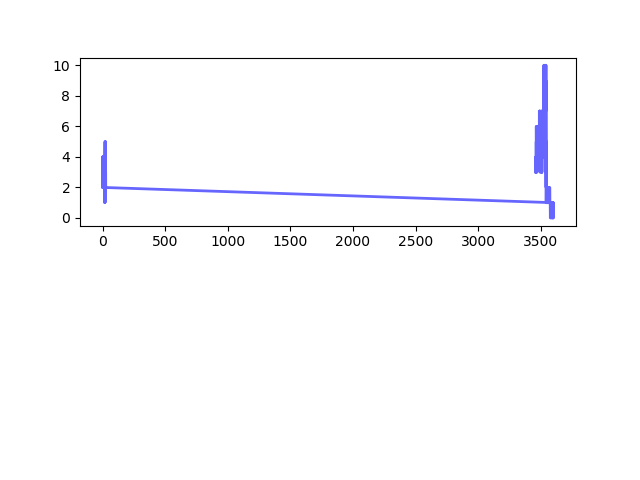

/Users/jack.lingheng.meng/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [106]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(time_seq[83206:87206], occupancy_seq[83206:87206], 'b-', lw=2, alpha=0.6)

plt.subplot(2,1,1)


plt.show()

# Data Collected on Sep. 13
<img src="./Sep_13_baseline_reward.png"  /> 